In [1]:
chirps = [20., 16., 19.8, 18.4, 17.1, 15.5,14.7,17.1,15.4,16.2, 15., 17.2, 16., 17., 14.1]
temp = [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82., 69.4, 83.3, 78.6, 82.6, 80.6, 83.5, 76.3]

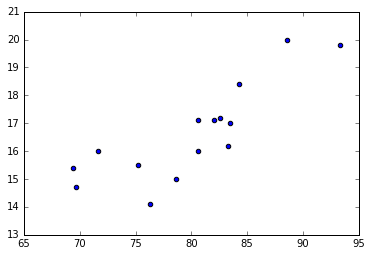

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

# now try to predict chirps with temp

plt.scatter(temp, chirps)

In [3]:
x = np.expand_dims(chirps,axis=1)
ones = np.ones(shape=(len(chirps),1))
X = np.hstack((ones,x)) #this is your design matrix
n = X.shape[0]
k = X.shape[1]
y = np.expand_dims(temp, axis=1)

Q, R = np.linalg.qr(X)
RInv = np.linalg.inv(R)
RtInv = np.linalg.inv(R.T)
V_beta = RInv.dot(RtInv)
Beta_hat = RInv.dot(Q.T.dot(y))
df = n-k 
e=y-X.dot(Beta_hat) # error vector = difference in predictions
s2 = np.sum(e.T.dot(e))/df # sum of squared errors!

Ok, we have the first part of the regression, the prediction. Now we can do simulation starting from the posterior to get the distributions of the **parameters**. Remember we are regressing against stochastic *parameters.*

In [4]:
n_sims = 100000
sigma = np.reshape(np.sqrt(st.invgamma.rvs(a=df/2.,scale=1./(df*s2/2.), size=n_sims)),(-1,1))
B_sims = np.repeat(Beta_hat.T,n_sims,axis=0)+sigma*np.random.multivariate_normal(mean=np.zeros(2),cov=V_beta,size=(n_sims,))

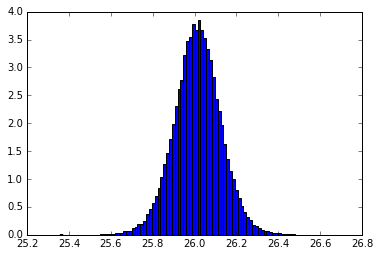

In [5]:
B0_hist = plt.hist((B_sims[:,0]),bins=100,normed=True);

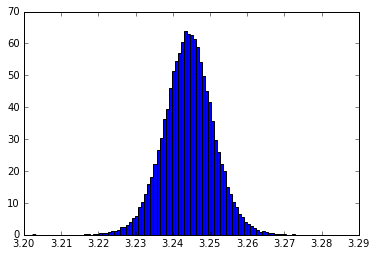

In [6]:
B1_hist = plt.hist((B_sims[:,1]),bins=100,normed=True);